# One-Dimensional Climate Models: Brown Dwarfs w/ Chemical Equilibrium and Resort-Rebin

In this tutorial you will learn how to run 1d climate models with chemical equilibrium but using resort rebin instead of the pre-weighted chemeq tables. 


In [1]:
import warnings
warnings.filterwarnings('ignore')
import picaso.justdoit as jdi
import picaso.justplotit as jpi
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from astropy import constants as const
from astropy import units as u
import sys
import pandas as pd

## Setting up Initial Run (highlighting main differences for resort-rebin)

In [2]:
sonora_profile_db = '/Users/nbatalh1/Documents/data/sonora_bobcat/structures_m+0.0' #recommended download #2 above

gases_fly = ['CO','CH4','H2O','NH3','CO2','N2','HCN','H2','He','PH3','C2H2','Na','K','TiO','VO','FeH']

#change opacity connection 
opacity_ck = jdi.opannection(method='resortrebin',preload_gases=gases_fly) # grab your opacities


In [3]:
cl_run = jdi.inputs(calculation="browndwarf", climate = True) # start a calculation


tint= 700 
grav = 316 # Gravity of your Planet in m/s/s

cl_run.gravity(gravity=grav, gravity_unit=u.Unit('m/(s**2)')) # input gravity
cl_run.effective_temp(tint) # input effective temperature

nlevel = 91 


We recommend starting with Sonora-Bobcat models as an initial guess. 

In [4]:
pressure,temp_guess = np.loadtxt(jdi.os.path.join(
                            sonora_profile_db,f"t{tint}g{grav}nc_m0.0.dat"),
                            usecols=[1,2],unpack=True, skiprows = 1)


nofczns = 1 # number of convective zones initially. Let's not play with this for now.

nstr_upper = 79 # top most level of guessed convective zone
nstr_deep = nlevel -2 # this is always the case. Dont change this
nstr = np.array([0,nstr_upper,89,0,0,0]) # initial guess of convective zones

# Here are some other parameters needed for the code.
rfacv = 0.0 #we are focused on a brown dwarf so let's keep this as is

In [5]:
cl_run.inputs_climate(temp_guess= temp_guess, pressure= pressure,
                        nstr = nstr, nofczns = nofczns , rfacv = rfacv)
mh=1
cto = 1 
#now that we are not using preweighted ck tables we need to tell picaso how to compute chemistry on the fly 
cl_run.atmosphere(mh=mh, cto=cto, chem_method='visscher')



In [ ]:
out = cl_run.climate(opacity_ck, save_all_profiles = True, with_spec=True)

## Compare Resort-rebin and Pre-weighted CK table derived Climate Profiles

Text(0.5, 0, 'Temperature [K]')

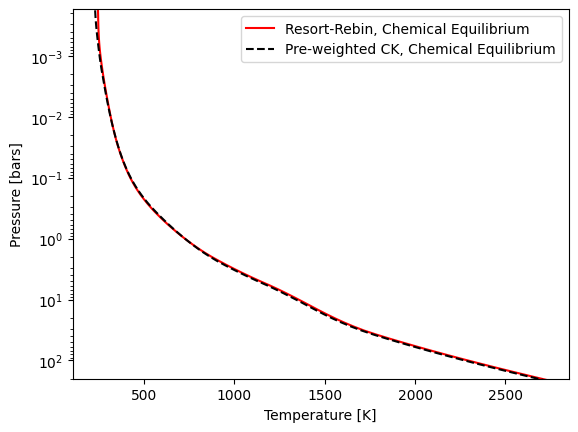

In [7]:
plt.ylim(200,1.7e-4)
plt.semilogy(out['temperature'],out['pressure'],"r", label='Resort-Rebin, Chemical Equilibrium')
plt.semilogy(temp_guess,pressure,color="k",linestyle="--", label='Pre-weighted CK, Chemical Equilibrium')
plt.legend()
plt.ylabel('Pressure [bars]')
plt.xlabel('Temperature [K]')